In [ ]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [24]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'India')].copy()

df_DA_IN['job_posted_month_no'] = df_DA_IN['job_posted_date'].dt.month
df_DA_IN_explode = df_DA_IN.explode('job_skills')

In [25]:
df_DA_IN_pivot = df_DA_IN_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_IN_pivot.loc['Total'] = df_DA_IN_pivot.sum()
df_DA_IN_pivot = df_DA_IN_pivot[df_DA_IN_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_IN_pivot = df_DA_IN_pivot.drop('Total')


In [26]:
DA_Total = df_DA_IN.groupby('job_posted_month_no').size()

df_DA_IN_percent = df_DA_IN_pivot.div(DA_Total/100, axis=0)

In [27]:
df_DA_IN_percent = df_DA_IN_percent.reset_index()
df_DA_IN_percent['job_posted_month'] = df_DA_IN_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IN_percent = df_DA_IN_percent.set_index('job_posted_month')
df_DA_IN_percent = df_DA_IN_percent.drop(columns='job_posted_month_no')

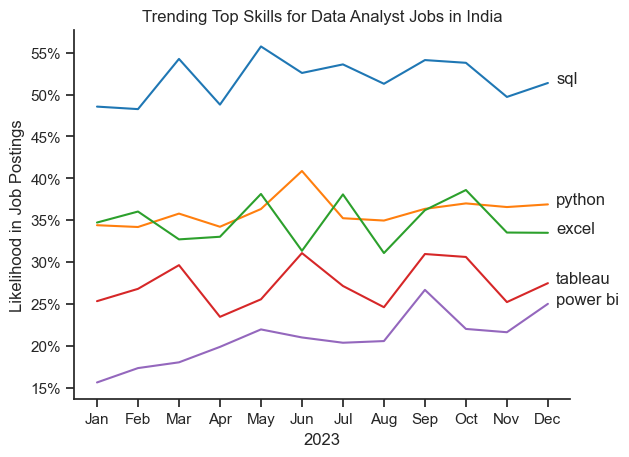

In [37]:
df_plot = df_DA_IN_percent.iloc[:, :5]

sns.set_theme(style="ticks")
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.despine()

plt.title('Trending Top Skills for Data Analyst Jobs in India')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])